In [17]:
!pip install praw

In [18]:
import praw
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [19]:
reddit = praw.Reddit(
client_id='YInV4xVVBJnugAKQFHFZyg',
client_secret='5qHOPC3t0PkG-umIYBbMJkucYp_8nw',
user_agent='UmairRedditBot'
)

In [20]:
main_categories = {
    "gaming": "Gaming",
    "education": "Education",
    "music": "Music",
    "technology": "Technology",
    "science": "Science",
    "writingprompts": "Story"
}

In [21]:
def extract_posts(subreddit_map, posts_per_category=300):
    all_posts = []
    for sub_name, label in subreddit_map.items():
        subreddit = reddit.subreddit(sub_name)
        print(f"Fetching from r/{sub_name} → {label}")
        for post in subreddit.hot(limit=posts_per_category):
            content = (post.title or "") + " " + (post.selftext or "")
            all_posts.append([content.strip(), label])
    return pd.DataFrame(all_posts, columns=["text", "category"])

data = extract_posts(main_categories)


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching from r/gaming → Gaming


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching from r/education → Education


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching from r/music → Music


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching from r/technology → Technology


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching from r/science → Science


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching from r/writingprompts → Story


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



In [22]:
def preprocess_text(text):
    lemmatizer = WordNetLemmatizer()
    words = text.lower().split()
    words = [lemmatizer.lemmatize(w) for w in words if w not in ENGLISH_STOP_WORDS]
    return " ".join(words)

data["text"] = data["text"].fillna("").apply(preprocess_text)


In [23]:
conn = sqlite3.connect("reddit_posts.db")
data.to_sql("reddit_data", conn, if_exists="replace", index=False)
conn.commit()
conn.close()


In [24]:
conn = sqlite3.connect("reddit_posts.db")
data = pd.read_sql("SELECT * FROM reddit_data", conn)
conn.close()

# Encode categories into numbers
label_encoder = LabelEncoder()
data["label_encoded"] = label_encoder.fit_transform(data["category"])


In [25]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data["text"])
y = data["label_encoded"]


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

Accuracy: 0.8666666666666667
              precision    recall  f1-score   support

   Education       0.80      1.00      0.89        60
      Gaming       0.85      0.85      0.85        60
       Music       0.98      0.82      0.89        60
     Science       0.86      0.90      0.88        60
       Story       0.90      0.92      0.91        60
  Technology       0.84      0.72      0.77        60

    accuracy                           0.87       360
   macro avg       0.87      0.87      0.87       360
weighted avg       0.87      0.87      0.87       360



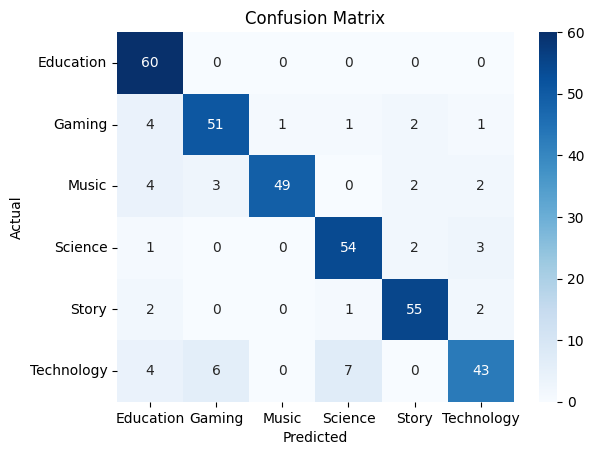

In [27]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [28]:
def predict_category(text):
    clean = preprocess_text(text)
    vec = vectorizer.transform([clean])
    pred = model.predict(vec)[0]
    return label_encoder.inverse_transform([pred])[0]

# Example
print(predict_category("Check the new Call of Duty trailer on PS5"))


Gaming


In [29]:
!pip install joblib


In [30]:
import joblib

# Save model
joblib.dump(model, "reddit_category_model.pkl")

# Save vectorizer
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")

# Save label encoder
joblib.dump(label_encoder, "label_encoder.pkl")

print("Model, vectorizer, and labels saved successfully.")


✅ Model, vectorizer, and labels saved successfully.


In [31]:
import joblib

model = joblib.load("reddit_category_model.pkl")
vectorizer = joblib.load("tfidf_vectorizer.pkl")
label_encoder = joblib.load("label_encoder.pkl")

def preprocess_text(text):
    # Paste same function used during training
    from nltk.stem import WordNetLemmatizer
    from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
    text = text.lower()
    lemmatizer = WordNetLemmatizer()
    words = text.split()
    words = [lemmatizer.lemmatize(w) for w in words if w not in ENGLISH_STOP_WORDS]
    return " ".join(words)

def predict_category(text):
    cleaned = preprocess_text(text)
    vec = vectorizer.transform([cleaned])
    pred = model.predict(vec)[0]
    return label_encoder.inverse_transform([pred])[0]


In [32]:
print(predict_category("Here are 10 easy math tricks every teacher should know"))
# → Likely prediction: "Education"

Education


##Web Integrations

In [60]:
import os

# Make sure templates folder exists
os.makedirs("templates", exist_ok=True)

html_content = """<!DOCTYPE html>
<!-- templates/index.html -->
<!DOCTYPE html>
<html>
<head>
    <title>Reddit Post Classifier</title>
    <style>
        body { font-family: Arial, sans-serif; text-align: center; margin-top: 50px; }
        input[type="text"] { width: 400px; padding: 10px; margin: 10px; }
        input[type="submit"] { padding: 10px 20px; }
    </style>
</head>
<body>
    <h1>Reddit Post Category Classifier</h1>
    <form method="post" action="/predict">
        <input type="text" name="post" placeholder="Enter your Reddit post text here" required>
        <br>
        <input type="submit" value="Classify">
    </form>
</body>
</html>

"""

# ✅ Save to templates/index.html
with open("templates/index.html", "w", encoding="utf-8") as f:
    f.write(html_content)

print("✔️ templates/index.html saved successfully!")


✔️ templates/index.html saved successfully!


In [61]:
import os

# Make sure templates folder exists
os.makedirs("templates", exist_ok=True)

Result = """
<!DOCTYPE html>
<html>
<head>
    <title>Classification Result</title>
    <style>
        body { font-family: Arial, sans-serif; text-align: center; margin-top: 100px; }
        .result { font-size: 28px; color: green; }
        a { margin-top: 30px; display: inline-block; text-decoration: none; color: #007BFF; }
    </style>
</head>
<body>
    <div class="result">Predicted Category: <strong>{{ prediction }}</strong></div>
    <a href="/">← Classify another post</a>
</body>
</html>

"""
# ✅ Save to templates/result.html
with open("templates/result.html", "w", encoding="utf-8") as f:
    f.write(Result)

print("✔️ templates/result.html saved successfully!")

✔️ templates/result.html saved successfully!


In [35]:
!pip install pyngrok
nltk.download('wordnet')
nltk.download('omw-1.4')

In [62]:
from flask import Flask, request, render_template
import joblib
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from pyngrok import ngrok

# Load model, vectorizer, and label encoder
model = joblib.load("reddit_category_model.pkl")
vectorizer = joblib.load("tfidf_vectorizer.pkl")
label_encoder = joblib.load("label_encoder.pkl")

app = Flask(__name__)

def preprocess_text(text):
    lemmatizer = WordNetLemmatizer()
    text = text.lower()
    words = text.split()
    words = [lemmatizer.lemmatize(w) for w in words if w not in ENGLISH_STOP_WORDS]
    return " ".join(words)

@app.route("/")
def index():
    return render_template("index.html")

@app.route("/predict", methods=["POST"])
def predict():
    post_text = request.form["post"]
    cleaned = preprocess_text(post_text)
    vectorized = vectorizer.transform([cleaned])
    label = model.predict(vectorized)[0]
    prediction = label_encoder.inverse_transform([label])[0]
    return render_template("result.html", prediction=prediction)

# Start Flask app via ngrok
if __name__ == "__main__":
    ngrok.set_auth_token("2zauZRSPdqjhHLsWBlo46xaK5yU_6n2XbifFQf8xoqi9HVZVA")
    public_url = ngrok.connect(5000)
    print("Public URL:", public_url)
    app.run(port=5000)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Public URL: NgrokTunnel: "https://05986b13fbf8.ngrok-free.app" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [25/Jul/2025 06:22:54] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [25/Jul/2025 06:22:55] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [25/Jul/2025 06:22:57] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [25/Jul/2025 06:23:01] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [25/Jul/2025 06:23:04] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [25/Jul/2025 06:23:11] "GET / HTTP/1.1" 200 -
